In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding ,SimpleRNN,Dense

import warnings
warnings.filterwarnings("ignore")

In [3]:
features =10000
length = 500
batch_size =32

In [4]:
(X_tr,y_tr),(X_te,y_te)= imdb.load_data(num_words=features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
X_tr.shape

(25000,)

In [6]:
len(X_tr[0])

218

In [7]:
len(X_tr[6343])

168

In [8]:
X_tr = sequence.pad_sequences(X_tr,maxlen=length)
X_te = sequence.pad_sequences(X_te,maxlen=length)

In [9]:
len(X_tr[0])

500

In [10]:
len(X_tr[6343])

500

In [11]:
model =Sequential([
    Embedding(features,32),
    SimpleRNN(32),
    Dense(1,activation="sigmoid")
])

In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [14]:
model.fit(X_tr,y_tr,epochs=20,batch_size=batch_size,validation_data=(X_te,y_te))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 110ms/step - accuracy: 0.5526 - loss: 0.6841 - val_accuracy: 0.6375 - val_loss: 0.6279
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.7453 - loss: 0.5266 - val_accuracy: 0.6616 - val_loss: 0.6124
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.8344 - loss: 0.3861 - val_accuracy: 0.7868 - val_loss: 0.4879
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.9266 - loss: 0.1967 - val_accuracy: 0.7584 - val_loss: 0.5717
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.9757 - loss: 0.0862 - val_accuracy: 0.7461 - val_loss: 0.7172
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9901 - loss: 0.0390 - val_accuracy: 0.7802 - val_loss: 0.7965
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.7893 - val_loss: 0.8606
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.9907 - loss: 0.0

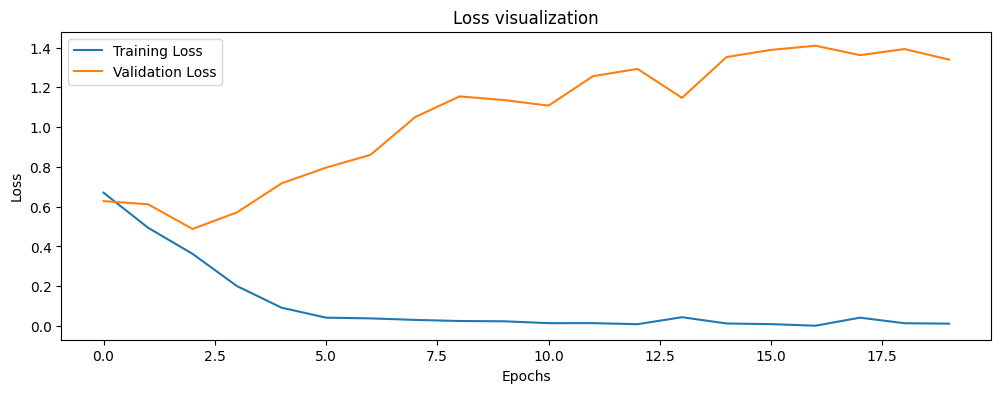

In [17]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["loss"],label="Training Loss")
plt.plot(model.history.history["val_loss"],label="Validation Loss")
plt.title("Loss visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

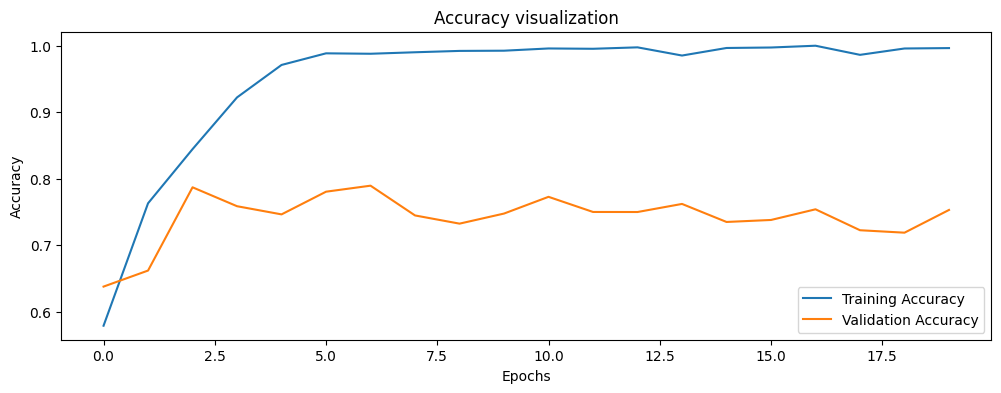

In [18]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["accuracy"],label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
